In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Dataset
ds = pd.read_csv('Auto_MPG.csv')
ds.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
ds.info()
#missing values are sometimes marked with a ? symbol instead of a blank space.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
# Missing values per column
nulls_per_column = ds.isnull().sum()
print("Missing values per column:")
print(nulls_per_column)

print("\nColumns with missing values:")
print(nulls_per_column[nulls_per_column > 0])

# Overall missing value check
total_nulls = nulls_per_column.sum()

if total_nulls == 0:
    print("\nNo missing values present.")
else:
    print("\nMissing values present.")


Missing values per column:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Columns with missing values:
Series([], dtype: int64)

No missing values present.


In [5]:
(ds.describe())

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# 'coerce' means: "if you find text that isn't a number, turn it into NaN"
ds['horsepower'] = pd.to_numeric(ds['horsepower'], errors='coerce')

# Now check for nulls again
print(ds.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [7]:
# Handling missing values
median_hp = ds['horsepower'].median()
ds['horsepower'] = ds['horsepower'].fillna(median_hp)

# Check info one last time to confirm it is now a 'float'
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [8]:
print(list(ds.columns))

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']


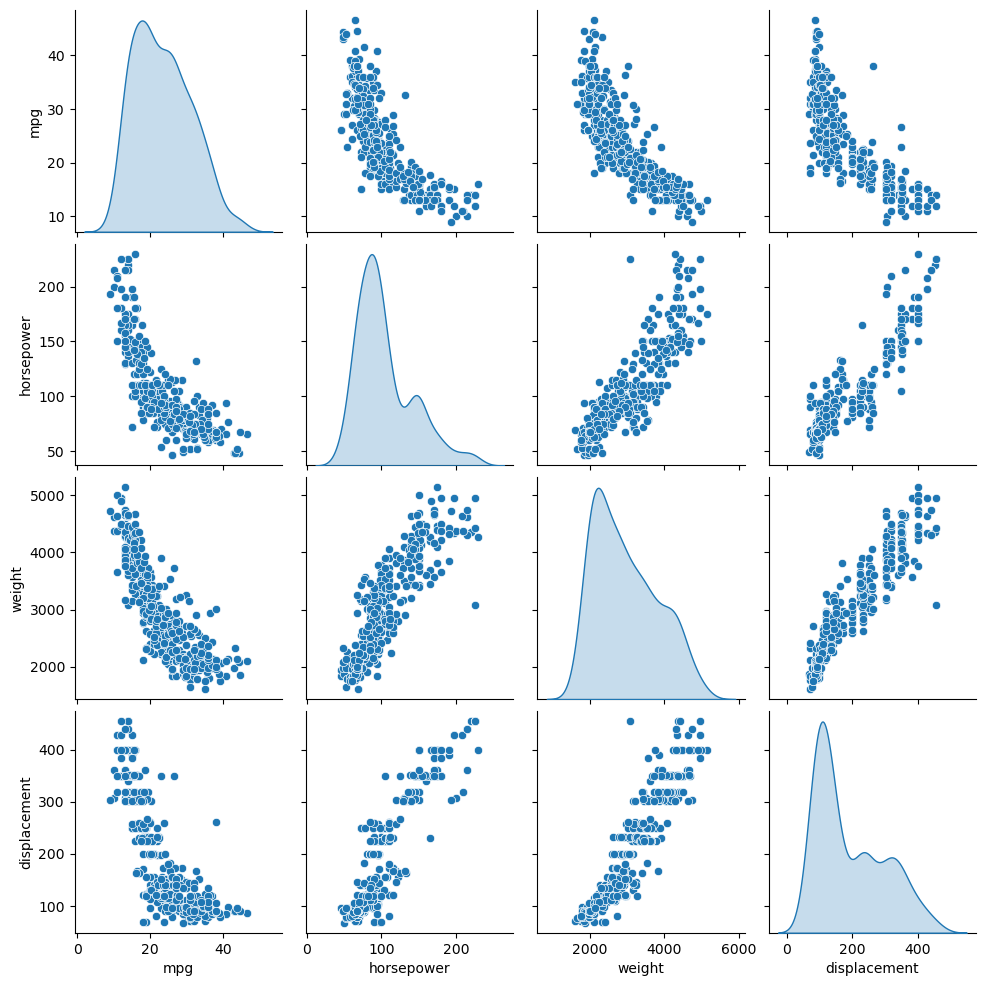

In [9]:
sns.pairplot(ds[['mpg', 'horsepower', 'weight', 'displacement']], diag_kind='kde')  #kernal density estimate
plt.show()

### **Observation from Data Visualization**

Based on the Pair Plot above, we can observe the following patterns:

* **MPG vs. Weight:** There is a clear **negative correlation**. As weight increases, MPG decreases linearly.
* **MPG vs. Horsepower:** Similarly, as horsepower increases, mileage drops.
* **Linearity:** The relationship between the target (`mpg`) and the main features resembles a straight line.

**Conclusion:**
Since the data shows a strong linear relationship, **Linear Regression** is the most suitable starting algorithm.

In [16]:
from sklearn.model_selection import train_test_split
#Features & Target
X = data[['horsepower', 'weight', 'displacement']]
y = data['mpg']

#Split Data (80-20)%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data is ready to decide which model to use")

Data is ready to decide which model to use


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

#Defining 3 candidates
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

#loop through for testing
print(f"{'Model Name':<20} | {'MAE (Error)':<12} | {'Accuracy (R2)':<12}")
print("-" * 50)

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Calculate Scores
    mae = mean_absolute_error(y_test, predictions) #lower is better
    r2 = r2_score(y_test, predictions)             #higher (closer to 1.0) is better
    
    print(f"{name:<20} | {mae:<12.2f} | {r2:<12.2f}")

Model Name           | MAE (Error)  | Accuracy (R2)
--------------------------------------------------
Linear Regression    | 3.13         | 0.73        
Decision Tree        | 3.20         | 0.56        
Random Forest        | 2.50         | 0.78        


## 📊 Model Comparison & Final Selection

### 1. Initial Hypothesis (Visual Inspection)
During the Data Visualization phase (**Pairplot**), we observed a strong **negative correlation** between `mpg` and features like `weight` and `displacement`. The data points appeared to follow a generally straight path, which initially suggested that **Linear Regression** would be the best fit.

### 2. The Experiment
To verify this, we tested three distinct algorithms:
* **Linear Regression:** To test our "straight line" theory.
* **Decision Tree:** To see if a simple rule-based approach worked better.
* **Random Forest:** To see if an ensemble of trees could capture complex patterns.

### 3. The Results

| Model Name | MAE (Error) | Accuracy (R2) |
| :--- | :--- | :--- |
| Linear Regression | 3.13 | 0.73 |
| Decision Tree | 3.20 | 0.56 |
| **Random Forest** | **2.50** | **0.78** |

### 4. Conclusion
While **Linear Regression** performed reasonably well (confirming our visual inspection was partially correct), **Random Forest outperformed it**.

> **Why?**
> Real-world data is rarely a perfect straight line. **Random Forest** was able to capture the slight curves and irregularities in the relationship between *Horsepower/Weight* and *MPG* that the simple Linear Regression missed.

> **🎯 Final Decision:**
> We will proceed with the **Random Forest** model for our final predictions as it provides the **highest accuracy (78%)** and **lowest error**.

In [19]:
#Real-World Prediction using RF Model

best_model = models["Random Forest"]

#"New Car" 
#Let's imagine a car with: 150 Horsepower, 3500 lbs Weight, 300 Displacement
print("Predicting for a new car parameters: HP=150, Weight=3500, Disp=300")

new_car_data = pd.DataFrame([[150, 3500, 300]], 
                            columns=['horsepower', 'weight', 'displacement'])

#answer
prediction = best_model.predict(new_car_data)

print(f"------------------------------------------------")
print(f"Predicted Mileage: {prediction[0]:.2f} MPG")
print(f"------------------------------------------------")
print(f"------------------------------------------------")
print(f"(Note: We trust this prediction because this model")
print(f" achieved 78% Accuracy during our testing phase.)")

Predicting for a new car parameters: HP=150, Weight=3500, Disp=300
------------------------------------------------
Predicted Mileage: 16.73 MPG
------------------------------------------------
------------------------------------------------
(Note: We trust this prediction because this model
 achieved 78% Accuracy during our testing phase.)


In [20]:
import joblib

# 1. Save the model to a file named 'car_mpg_model.pkl'
joblib.dump(best_model, 'car_mpg_model.pkl')

print("Success! Your model is saved as 'car_mpg_model.pkl'.")
print("You can now close this notebook without losing your work.")

Success! Your model is saved as 'car_mpg_model.pkl'.
You can now close this notebook without losing your work.
